# BEST NEIGHBORHOOD FOR FIRE TRAINER TO RESIDE IN 🧯🔥

## To start off, let us first import all of our data and goodies to be able to get started!

In [40]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

fire_csv = "https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02"
fire_data = pd.read_csv(fire_csv)
fire_data.head()

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",1,2016-04-21T05:01:04,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,2,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",1,2018-03-13T08:34:43,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,3,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",0,2018-03-13T11:54:23,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607


## Alright, now lets clean it up to make it look better!

In [26]:
# Filtering to fire-related incidents
fire_incidents = fire_data[fire_data["type_description"].str.contains("fire", case=False, na=False)]

# Grouping by both neighborhood and type_description
fire_counts = fire_incidents.groupby(["neighborhood", "type_description"]).size().reset_index(name="count")

# Sorting by count descending
fire_counts = fire_counts.sort_values(by="count", ascending=False)

# Show the top 10 combinations
print(fire_counts.head(10))


                   neighborhood                     type_description  count
224                     Carrick                        Building fire     95
1140        Squirrel Hill South  Cooking fire, confined to container     80
1053           South Side Flats  Cooking fire, confined to container     76
990                   Shadyside  Cooking fire, confined to container     76
635                   Knoxville                        Building fire     71
434                East Liberty  Cooking fire, confined to container     70
584              Homewood North                        Building fire     65
248   Central Business District  Cooking fire, confined to container     65
1006                   Sheraden                        Building fire     63
1119        Squirrel Hill North  Cooking fire, confined to container     61


## Based on our data above, we can see that Carrick is where lies the most fires in general with a total of 95! But lets try and see it more visually to see what shows up.

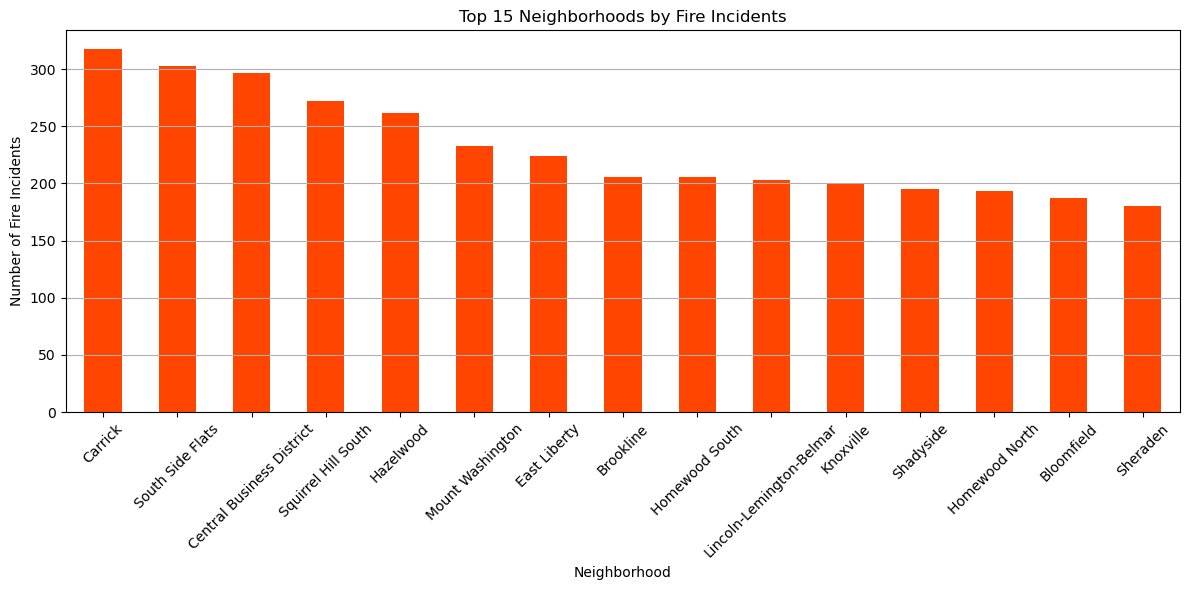

In [35]:
top15 = fire_incidents["neighborhood"].value_counts().head(15)

plt.figure(figsize=(12,6))
top15.plot(kind="bar", color="orangered")
plt.title("Top 15 Neighborhoods by Fire Incidents")
plt.ylabel("Number of Fire Incidents")
plt.xlabel("Neighborhood")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Now, we can see clearly that Carrick is in the lead but what does that mean on the map side of things. Let's check it out!

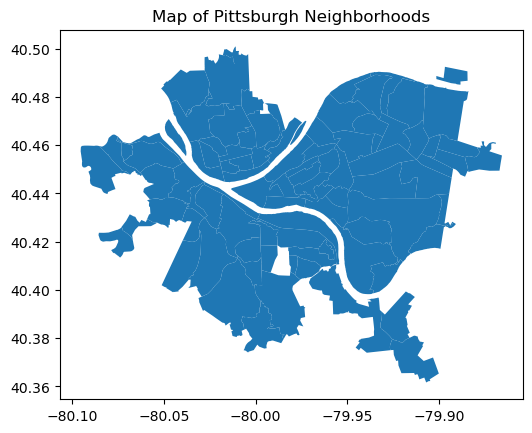

In [42]:
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()
plt.title("Map of Pittsburgh Neighborhoods")
plt.show()

## Now, lets just merge the data a little bit to make it better looking!

               hood  fire_incident_count  \
0   Central Oakland                  101   
1     North Oakland                  136   
2      West Oakland                   65   
3  Crawford-Roberts                  116   
4    Strip District                   79   

                                            geometry  
0  POLYGON ((-79.95304 40.44203, -79.95302 40.442...  
1  POLYGON ((-79.95455 40.45882, -79.95427 40.458...  
2  POLYGON ((-79.9623 40.44294, -79.9622 40.44289...  
3  POLYGON ((-79.98275 40.44641, -79.98273 40.446...  
4  POLYGON ((-79.97494 40.45629, -79.97484 40.456...  


<Figure size 1500x1000 with 0 Axes>

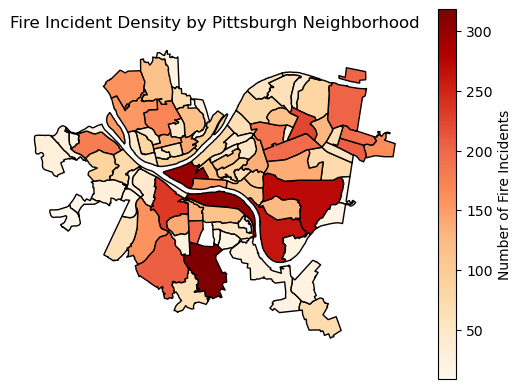

In [50]:
fire_counts = fire_incidents["neighborhood"].value_counts().reset_index()
fire_counts.columns = ["neighborhood", "fire_incident_count"]

# Merge fire incident data with the map
fire_map = neighborhoods.merge(fire_counts, how="left", left_on="hood", right_on="neighborhood")
print(fire_map[['hood', 'fire_incident_count', 'geometry']].head())

plt.figure(figsize=(15, 10))
fire_map.plot(
    column='fire_incident_count',
    cmap='OrRd', 
    edgecolor="black",
    legend=True,
    legend_kwds={'label': "Number of Fire Incidents"},
    missing_kwds={"color": "lightgrey", "label": "No Data"}
)
plt.title("Fire Incident Density by Pittsburgh Neighborhood")
plt.axis("off")
plt.show()


## And there you have it! Our beautiful map of where the fire pokemon trainers are most likely to go!